# 01_segmentation_train_eval.ipynb

This file performs the model training process of our Pix2Pix-based lung segmentation system.
Additionally, it performs model evaluation based on a seperately defined test dataset.

### Part 1: Define directories, import required libraries and setup sesion

In [1]:
# Change working directory to the root folder
import os, sys
if os.path.split(os.getcwd())[-1] != 'SmartDetect_segmentation':
    %cd ..
    sys.path.append("src")
    
    if os.path.split(os.getcwd())[-1] != 'SmartDetect_segmentation':
        raise UserError("Something went wrong in the directory reassignment!")

D:\SmartDetect_segmentation


In [2]:
# Perform required imports
import numpy as np
import matplotlib.pyplot as plt
from preprocessing import preprocessing
from dataset import generate_dataset
from model import define_discriminator, define_generator, define_gan
from training import *
from util.general import *
from util.inspection import *
from util.tf_session import *

# Setup GPU tensorflow session
n_gpus = setup_tf_gpu_session()

In [3]:
# Define some basic directories to use in the rest of this program
dataDir = os.path.join("data", "preprocessed")
modelDir = "model"
notebookDir = "notebook"
logDir = "logs"

### Part 2: Perform data preprocessing
Please note that since this part may take quite a long time, it is skipped on default if the software detects preprocessed data already.

In [4]:
# Preprocessing the data. 
# To rerun the preprocessing, change 'rerun' to True

preprocessing(rerun=False)

--- Performing data preprocessing --- 
Extracting data from:	D:\SmartDetect_segmentation\data\raw
Outputting data to:	D:\SmartDetect_segmentation\data\preprocessed

Extracting data from subset 'CXR_ChinaSet' (1/3)... 
(found 566 images)
 |##################################################| 100.0% 

Result: WARNING (Missed 96 mask files)

Extracting data from subset 'CXR_Manual  ' (2/3)... 
(found 171 images)
 |##################################################| 100.0% 

Result: OK

Extracting data from subset 'CXR_Mntg    ' (3/3)... 
(found 138 images)
 |##################################################| 100.0% 

Result: OK


### Part 3: Dataset generation
The data is split into a training and test set per default.
Validation is performed with the training set based on a later split.

In [5]:
dataset_train = generate_dataset(dataDir, split_dataset=True, train_or_test='train')
dataset_test = generate_dataset(dataDir, split_dataset=True, train_or_test='test')


--- Performing data extraction (train) ---

Extracting data from D:\SmartDetect_segmentation\data\preprocessed
 |##################################################| 100.0% 
Completed. Dataset consists of 701 images and is 0.74 GB

--- Performing data extraction (test) ---

Extracting data from D:\SmartDetect_segmentation\data\preprocessed
 |##################################################| 100.0% 
Completed. Dataset consists of 174 images and is 0.18 GB


##### Visual data inspection
Here, we will also briefly inspect the data we'll be training the model with.

--- Performing data inspection for dataset 'train' ---

Amount of subjects:	701
Image size:		256, 256


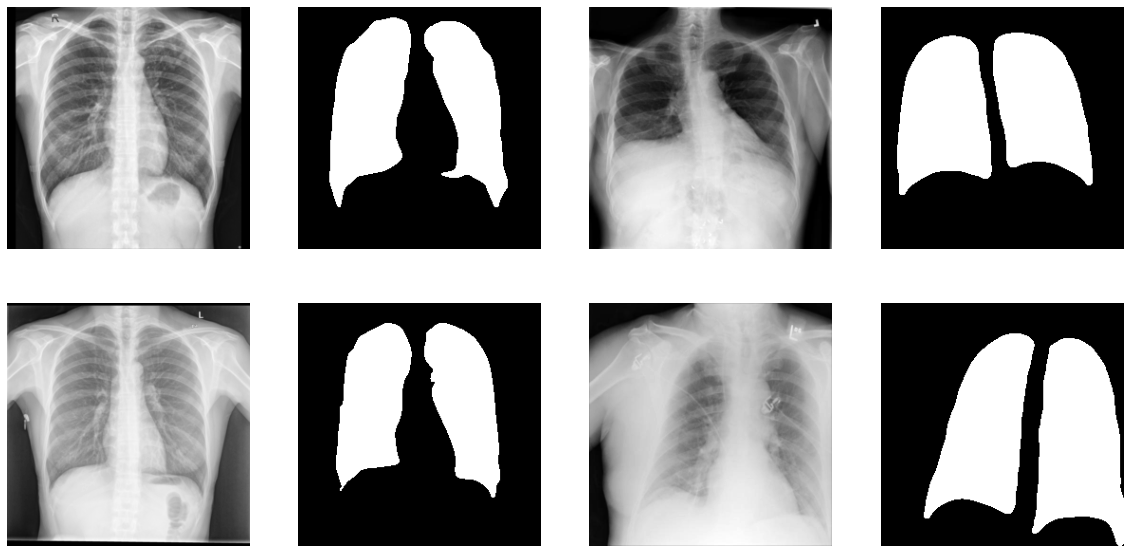



--- Performing data inspection for dataset 'test' ---

Amount of subjects:	174
Image size:		256, 256


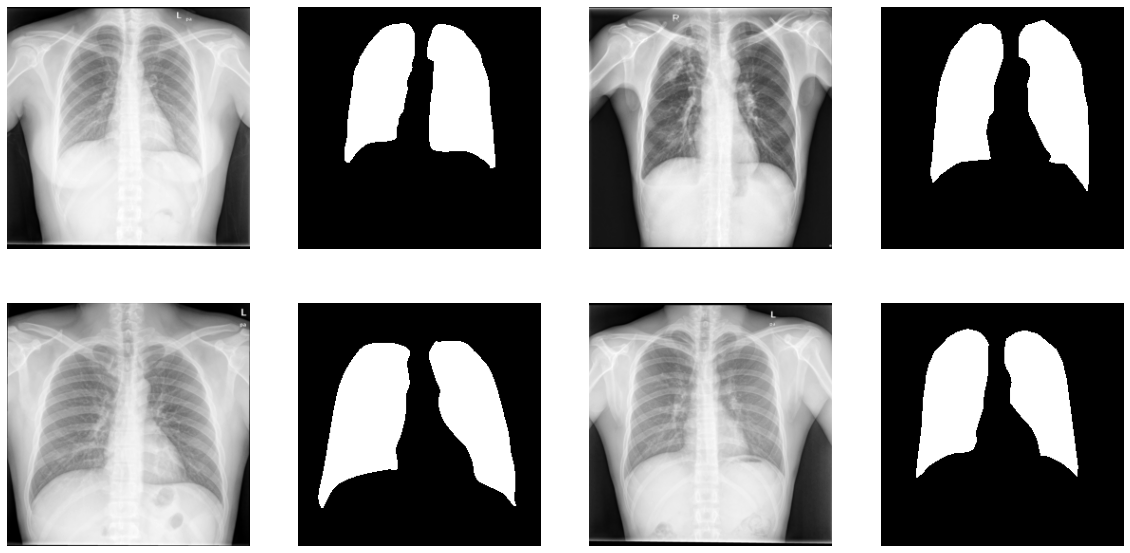

In [6]:
_, image_shape = inspect_dataset(dataset_train, 'train')
_, _ = inspect_dataset(dataset_test, 'test')

### Part 4: Model definition
Here, we will define the GAN model we'll be using for the segmentation purposes.
It is derived from the Pix2Pix model.

In [7]:
image_shape = (image_shape[0], image_shape[1], 1)

g_model = define_generator(image_shape)
d_model = define_discriminator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)

### Part 5: Monitoring
The training process is monitored via TensorBoard.
The results will be displayed here by default. Note, however, that we may also monitor the process manually or after training time by opening tensorboard via the terminal as such:

`tensorboard --logdir "logs"`

In [8]:
# %load_ext tensorboard
# %tensorboard --logdir {logDir}

### Part 6: Training
Here, the actual training process is performed. 
We may pass some hyperparameters in the 'train' function.

In [9]:
train(d_model, g_model, gan_model, dataset_train) 


Epoch 1/1000:


100%|#########################################################################################################################################################################| 140/140 [00:50<00:00,  2.77it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0000141.h5
>Validation MAE = 0.047981

Epoch 2/1000:


100%|#########################################################################################################################################################################| 140/140 [00:43<00:00,  3.25it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0000281.h5
>Validation MAE = 0.060953

Epoch 3/1000:


100%|#########################################################################################################################################################################| 140/140 [00:42<00:00,  3.28it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0000421.h5
>Validation MAE = 0.044881

Epoch 4/1000:


100%|#########################################################################################################################################################################| 140/140 [00:43<00:00,  3.22it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0000561.h5
>Validation MAE = 0.047587

Epoch 5/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.43it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0000701.h5
>Validation MAE = 0.046538

Epoch 6/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0000841.h5
>Validation MAE = 0.041141

Epoch 7/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0000981.h5
>Validation MAE = 0.040419

Epoch 8/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0001121.h5
>Validation MAE = 0.049858

Epoch 9/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0001261.h5
>Validation MAE = 0.032420

Epoch 10/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0001401.h5
>Validation MAE = 0.058391

Epoch 11/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0001541.h5
>Validation MAE = 0.044881

Epoch 12/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0001681.h5
>Validation MAE = 0.040689

Epoch 13/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0001821.h5
>Validation MAE = 0.025151

Epoch 14/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0001961.h5
>Validation MAE = 0.036075

Epoch 15/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0002101.h5
>Validation MAE = 0.032348

Epoch 16/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0002241.h5
>Validation MAE = 0.033871

Epoch 17/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0002381.h5
>Validation MAE = 0.035192

Epoch 18/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0002521.h5
>Validation MAE = 0.042896

Epoch 19/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0002661.h5
>Validation MAE = 0.047450

Epoch 20/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0002801.h5
>Validation MAE = 0.028396

Epoch 21/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0002941.h5
>Validation MAE = 0.044862

Epoch 22/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0003081.h5
>Validation MAE = 0.040424

Epoch 23/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0003221.h5
>Validation MAE = 0.030141

Epoch 24/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0003361.h5
>Validation MAE = 0.034106

Epoch 25/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0003501.h5
>Validation MAE = 0.028877

Epoch 26/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0003641.h5
>Validation MAE = 0.046247

Epoch 27/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0003781.h5
>Validation MAE = 0.045165

Epoch 28/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0003921.h5
>Validation MAE = 0.040609

Epoch 29/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0004061.h5
>Validation MAE = 0.034123

Epoch 30/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0004201.h5
>Validation MAE = 0.044356

Epoch 31/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0004341.h5
>Validation MAE = 0.023822

Epoch 32/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0004481.h5
>Validation MAE = 0.045703

Epoch 33/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0004621.h5
>Validation MAE = 0.030313

Epoch 34/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0004761.h5
>Validation MAE = 0.032833

Epoch 35/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0004901.h5
>Validation MAE = 0.046617

Epoch 36/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0005041.h5
>Validation MAE = 0.024906

Epoch 37/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0005181.h5
>Validation MAE = 0.036213

Epoch 38/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0005321.h5
>Validation MAE = 0.029797

Epoch 39/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0005461.h5
>Validation MAE = 0.035366

Epoch 40/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0005601.h5
>Validation MAE = 0.032032

Epoch 41/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0005741.h5
>Validation MAE = 0.044712

Epoch 42/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0005881.h5
>Validation MAE = 0.048522

Epoch 43/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.48it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0006021.h5
>Validation MAE = 0.026578

Epoch 44/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0006161.h5
>Validation MAE = 0.020718

Epoch 45/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0006301.h5
>Validation MAE = 0.021602

Epoch 46/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0006441.h5
>Validation MAE = 0.033519

Epoch 47/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0006581.h5
>Validation MAE = 0.028095

Epoch 48/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0006721.h5
>Validation MAE = 0.019719

Epoch 49/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0006861.h5
>Validation MAE = 0.038666

Epoch 50/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0007001.h5
>Validation MAE = 0.031636

Epoch 51/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0007141.h5
>Validation MAE = 0.029782

Epoch 52/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0007281.h5
>Validation MAE = 0.034206

Epoch 53/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0007421.h5
>Validation MAE = 0.040278

Epoch 54/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0007561.h5
>Validation MAE = 0.027898

Epoch 55/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0007701.h5
>Validation MAE = 0.020813

Epoch 56/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0007841.h5
>Validation MAE = 0.059731

Epoch 57/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0007981.h5
>Validation MAE = 0.044890

Epoch 58/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0008121.h5
>Validation MAE = 0.036029

Epoch 59/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0008261.h5
>Validation MAE = 0.033797

Epoch 60/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0008401.h5
>Validation MAE = 0.038187

Epoch 61/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0008541.h5
>Validation MAE = 0.028489

Epoch 62/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0008681.h5
>Validation MAE = 0.033503

Epoch 63/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0008821.h5
>Validation MAE = 0.032256

Epoch 64/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0008961.h5
>Validation MAE = 0.030974

Epoch 65/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0009101.h5
>Validation MAE = 0.056779

Epoch 66/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0009241.h5
>Validation MAE = 0.041058

Epoch 67/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0009381.h5
>Validation MAE = 0.027399

Epoch 68/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0009521.h5
>Validation MAE = 0.043449

Epoch 69/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0009661.h5
>Validation MAE = 0.041785

Epoch 70/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0009801.h5
>Validation MAE = 0.068409

Epoch 71/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0009941.h5
>Validation MAE = 0.028158

Epoch 72/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0010081.h5
>Validation MAE = 0.048104

Epoch 73/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0010221.h5
>Validation MAE = 0.063927

Epoch 74/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0010361.h5
>Validation MAE = 0.024406

Epoch 75/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0010501.h5
>Validation MAE = 0.036454

Epoch 76/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0010641.h5
>Validation MAE = 0.027815

Epoch 77/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0010781.h5
>Validation MAE = 0.054471

Epoch 78/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0010921.h5
>Validation MAE = 0.035902

Epoch 79/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0011061.h5
>Validation MAE = 0.031231

Epoch 80/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0011201.h5
>Validation MAE = 0.028548

Epoch 81/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0011341.h5
>Validation MAE = 0.035969

Epoch 82/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.48it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0011481.h5
>Validation MAE = 0.026983

Epoch 83/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0011621.h5
>Validation MAE = 0.042063

Epoch 84/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0011761.h5
>Validation MAE = 0.026620

Epoch 85/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0011901.h5
>Validation MAE = 0.032075

Epoch 86/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0012041.h5
>Validation MAE = 0.043050

Epoch 87/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0012181.h5
>Validation MAE = 0.042800

Epoch 88/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0012321.h5
>Validation MAE = 0.026820

Epoch 89/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0012461.h5
>Validation MAE = 0.036866

Epoch 90/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0012601.h5
>Validation MAE = 0.037322

Epoch 91/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0012741.h5
>Validation MAE = 0.035820

Epoch 92/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.48it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0012881.h5
>Validation MAE = 0.040469

Epoch 93/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0013021.h5
>Validation MAE = 0.036112

Epoch 94/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0013161.h5
>Validation MAE = 0.036177

Epoch 95/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0013301.h5
>Validation MAE = 0.033708

Epoch 96/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0013441.h5
>Validation MAE = 0.030439

Epoch 97/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0013581.h5
>Validation MAE = 0.031790

Epoch 98/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0013721.h5
>Validation MAE = 0.031191

Epoch 99/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0013861.h5
>Validation MAE = 0.027053

Epoch 100/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0014001.h5
>Validation MAE = 0.024953

Epoch 101/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0014141.h5
>Validation MAE = 0.027224

Epoch 102/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0014281.h5
>Validation MAE = 0.029210

Epoch 103/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0014421.h5
>Validation MAE = 0.023490

Epoch 104/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0014561.h5
>Validation MAE = 0.059393

Epoch 105/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0014701.h5
>Validation MAE = 0.026931

Epoch 106/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0014841.h5
>Validation MAE = 0.033612

Epoch 107/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0014981.h5
>Validation MAE = 0.029725

Epoch 108/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0015121.h5
>Validation MAE = 0.033526

Epoch 109/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0015261.h5
>Validation MAE = 0.034138

Epoch 110/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0015401.h5
>Validation MAE = 0.033104

Epoch 111/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0015541.h5
>Validation MAE = 0.028182

Epoch 112/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0015681.h5
>Validation MAE = 0.024519

Epoch 113/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0015821.h5
>Validation MAE = 0.033564

Epoch 114/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0015961.h5
>Validation MAE = 0.039686

Epoch 115/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0016101.h5
>Validation MAE = 0.026525

Epoch 116/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0016241.h5
>Validation MAE = 0.026432

Epoch 117/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0016381.h5
>Validation MAE = 0.038342

Epoch 118/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0016521.h5
>Validation MAE = 0.027031

Epoch 119/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0016661.h5
>Validation MAE = 0.038905

Epoch 120/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0016801.h5
>Validation MAE = 0.023044

Epoch 121/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0016941.h5
>Validation MAE = 0.030113

Epoch 122/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0017081.h5
>Validation MAE = 0.038842

Epoch 123/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0017221.h5
>Validation MAE = 0.028610

Epoch 124/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0017361.h5
>Validation MAE = 0.036768

Epoch 125/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0017501.h5
>Validation MAE = 0.037292

Epoch 126/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0017641.h5
>Validation MAE = 0.029924

Epoch 127/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0017781.h5
>Validation MAE = 0.030710

Epoch 128/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0017921.h5
>Validation MAE = 0.042145

Epoch 129/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0018061.h5
>Validation MAE = 0.032388

Epoch 130/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0018201.h5
>Validation MAE = 0.033676

Epoch 131/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0018341.h5
>Validation MAE = 0.047097

Epoch 132/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0018481.h5
>Validation MAE = 0.019493

Epoch 133/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0018621.h5
>Validation MAE = 0.038119

Epoch 134/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0018761.h5
>Validation MAE = 0.035458

Epoch 135/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0018901.h5
>Validation MAE = 0.035102

Epoch 136/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0019041.h5
>Validation MAE = 0.057926

Epoch 137/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0019181.h5
>Validation MAE = 0.050535

Epoch 138/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0019321.h5
>Validation MAE = 0.033941

Epoch 139/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0019461.h5
>Validation MAE = 0.027993

Epoch 140/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0019601.h5
>Validation MAE = 0.035256

Epoch 141/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0019741.h5
>Validation MAE = 0.025646

Epoch 142/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0019881.h5
>Validation MAE = 0.040193

Epoch 143/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0020021.h5
>Validation MAE = 0.046011

Epoch 144/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0020161.h5
>Validation MAE = 0.027130

Epoch 145/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0020301.h5
>Validation MAE = 0.030097

Epoch 146/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0020441.h5
>Validation MAE = 0.037527

Epoch 147/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0020581.h5
>Validation MAE = 0.035516

Epoch 148/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0020721.h5
>Validation MAE = 0.026799

Epoch 149/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0020861.h5
>Validation MAE = 0.030297

Epoch 150/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0021001.h5
>Validation MAE = 0.025007

Epoch 151/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0021141.h5
>Validation MAE = 0.032911

Epoch 152/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0021281.h5
>Validation MAE = 0.051205

Epoch 153/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0021421.h5
>Validation MAE = 0.025097

Epoch 154/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0021561.h5
>Validation MAE = 0.031995

Epoch 155/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0021701.h5
>Validation MAE = 0.028008

Epoch 156/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0021841.h5
>Validation MAE = 0.025406

Epoch 157/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0021981.h5
>Validation MAE = 0.039871

Epoch 158/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0022121.h5
>Validation MAE = 0.029404

Epoch 159/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0022261.h5
>Validation MAE = 0.027899

Epoch 160/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0022401.h5
>Validation MAE = 0.021914

Epoch 161/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0022541.h5
>Validation MAE = 0.035991

Epoch 162/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0022681.h5
>Validation MAE = 0.026614

Epoch 163/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0022821.h5
>Validation MAE = 0.027168

Epoch 164/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0022961.h5
>Validation MAE = 0.035350

Epoch 165/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0023101.h5
>Validation MAE = 0.045445

Epoch 166/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0023241.h5
>Validation MAE = 0.021754

Epoch 167/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0023381.h5
>Validation MAE = 0.026503

Epoch 168/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0023521.h5
>Validation MAE = 0.023459

Epoch 169/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0023661.h5
>Validation MAE = 0.051207

Epoch 170/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0023801.h5
>Validation MAE = 0.029133

Epoch 171/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0023941.h5
>Validation MAE = 0.029073

Epoch 172/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0024081.h5
>Validation MAE = 0.035463

Epoch 173/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0024221.h5
>Validation MAE = 0.041075

Epoch 174/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0024361.h5
>Validation MAE = 0.027787

Epoch 175/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0024501.h5
>Validation MAE = 0.030729

Epoch 176/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0024641.h5
>Validation MAE = 0.044199

Epoch 177/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0024781.h5
>Validation MAE = 0.041014

Epoch 178/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0024921.h5
>Validation MAE = 0.034637

Epoch 179/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0025061.h5
>Validation MAE = 0.033970

Epoch 180/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0025201.h5
>Validation MAE = 0.024448

Epoch 181/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0025341.h5
>Validation MAE = 0.036430

Epoch 182/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0025481.h5
>Validation MAE = 0.020858

Epoch 183/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0025621.h5
>Validation MAE = 0.038196

Epoch 184/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0025761.h5
>Validation MAE = 0.031485

Epoch 185/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0025901.h5
>Validation MAE = 0.023745

Epoch 186/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0026041.h5
>Validation MAE = 0.030149

Epoch 187/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0026181.h5
>Validation MAE = 0.043632

Epoch 188/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0026321.h5
>Validation MAE = 0.029602

Epoch 189/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0026461.h5
>Validation MAE = 0.035231

Epoch 190/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0026601.h5
>Validation MAE = 0.025871

Epoch 191/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0026741.h5
>Validation MAE = 0.033504

Epoch 192/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0026881.h5
>Validation MAE = 0.027568

Epoch 193/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0027021.h5
>Validation MAE = 0.034794

Epoch 194/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0027161.h5
>Validation MAE = 0.029330

Epoch 195/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0027301.h5
>Validation MAE = 0.019484

Epoch 196/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0027441.h5
>Validation MAE = 0.024773

Epoch 197/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0027581.h5
>Validation MAE = 0.033022

Epoch 198/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0027721.h5
>Validation MAE = 0.026725

Epoch 199/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0027861.h5
>Validation MAE = 0.027049

Epoch 200/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.48it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0028001.h5
>Validation MAE = 0.021494

Epoch 201/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0028141.h5
>Validation MAE = 0.024551

Epoch 202/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0028281.h5
>Validation MAE = 0.035181

Epoch 203/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0028421.h5
>Validation MAE = 0.022090

Epoch 204/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0028561.h5
>Validation MAE = 0.029225

Epoch 205/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0028701.h5
>Validation MAE = 0.053561

Epoch 206/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0028841.h5
>Validation MAE = 0.022013

Epoch 207/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0028981.h5
>Validation MAE = 0.028495

Epoch 208/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0029121.h5
>Validation MAE = 0.019280

Epoch 209/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.48it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0029261.h5
>Validation MAE = 0.051749

Epoch 210/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.48it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0029401.h5
>Validation MAE = 0.027157

Epoch 211/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0029541.h5
>Validation MAE = 0.019408

Epoch 212/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0029681.h5
>Validation MAE = 0.048856

Epoch 213/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0029821.h5
>Validation MAE = 0.046233

Epoch 214/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0029961.h5
>Validation MAE = 0.030982

Epoch 215/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0030101.h5
>Validation MAE = 0.037354

Epoch 216/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0030241.h5
>Validation MAE = 0.029482

Epoch 217/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0030381.h5
>Validation MAE = 0.036830

Epoch 218/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0030521.h5
>Validation MAE = 0.032199

Epoch 219/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.48it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0030661.h5
>Validation MAE = 0.049639

Epoch 220/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.48it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0030801.h5
>Validation MAE = 0.025021

Epoch 221/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0030941.h5
>Validation MAE = 0.057976

Epoch 222/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0031081.h5
>Validation MAE = 0.033068

Epoch 223/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0031221.h5
>Validation MAE = 0.028214

Epoch 224/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0031361.h5
>Validation MAE = 0.025534

Epoch 225/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0031501.h5
>Validation MAE = 0.061719

Epoch 226/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0031641.h5
>Validation MAE = 0.025128

Epoch 227/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0031781.h5
>Validation MAE = 0.035150

Epoch 228/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0031921.h5
>Validation MAE = 0.036075

Epoch 229/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0032061.h5
>Validation MAE = 0.037857

Epoch 230/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0032201.h5
>Validation MAE = 0.027328

Epoch 231/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0032341.h5
>Validation MAE = 0.021092

Epoch 232/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0032481.h5
>Validation MAE = 0.024366

Epoch 233/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0032621.h5
>Validation MAE = 0.028023

Epoch 234/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0032761.h5
>Validation MAE = 0.048166

Epoch 235/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0032901.h5
>Validation MAE = 0.042139

Epoch 236/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0033041.h5
>Validation MAE = 0.021911

Epoch 237/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0033181.h5
>Validation MAE = 0.045064

Epoch 238/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0033321.h5
>Validation MAE = 0.030815

Epoch 239/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0033461.h5
>Validation MAE = 0.027143

Epoch 240/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0033601.h5
>Validation MAE = 0.030905

Epoch 241/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0033741.h5
>Validation MAE = 0.023432

Epoch 242/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0033881.h5
>Validation MAE = 0.021150

Epoch 243/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0034021.h5
>Validation MAE = 0.051430

Epoch 244/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0034161.h5
>Validation MAE = 0.039828

Epoch 245/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0034301.h5
>Validation MAE = 0.024165

Epoch 246/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0034441.h5
>Validation MAE = 0.047143

Epoch 247/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0034581.h5
>Validation MAE = 0.052648

Epoch 248/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0034721.h5
>Validation MAE = 0.031764

Epoch 249/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0034861.h5
>Validation MAE = 0.042042

Epoch 250/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0035001.h5
>Validation MAE = 0.020840

Epoch 251/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0035141.h5
>Validation MAE = 0.025119

Epoch 252/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0035281.h5
>Validation MAE = 0.019385

Epoch 253/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0035421.h5
>Validation MAE = 0.027115

Epoch 254/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0035561.h5
>Validation MAE = 0.026550

Epoch 255/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0035701.h5
>Validation MAE = 0.019594

Epoch 256/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0035841.h5
>Validation MAE = 0.021132

Epoch 257/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0035981.h5
>Validation MAE = 0.036449

Epoch 258/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0036121.h5
>Validation MAE = 0.039945

Epoch 259/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0036261.h5
>Validation MAE = 0.031700

Epoch 260/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0036401.h5
>Validation MAE = 0.028647

Epoch 261/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0036541.h5
>Validation MAE = 0.034367

Epoch 262/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0036681.h5
>Validation MAE = 0.036430

Epoch 263/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0036821.h5
>Validation MAE = 0.023427

Epoch 264/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0036961.h5
>Validation MAE = 0.037147

Epoch 265/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0037101.h5
>Validation MAE = 0.027648

Epoch 266/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0037241.h5
>Validation MAE = 0.031446

Epoch 267/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0037381.h5
>Validation MAE = 0.031361

Epoch 268/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0037521.h5
>Validation MAE = 0.024191

Epoch 269/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0037661.h5
>Validation MAE = 0.022130

Epoch 270/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0037801.h5
>Validation MAE = 0.023640

Epoch 271/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0037941.h5
>Validation MAE = 0.024796

Epoch 272/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0038081.h5
>Validation MAE = 0.032786

Epoch 273/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0038221.h5
>Validation MAE = 0.025724

Epoch 274/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0038361.h5
>Validation MAE = 0.029752

Epoch 275/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0038501.h5
>Validation MAE = 0.039624

Epoch 276/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0038641.h5
>Validation MAE = 0.032850

Epoch 277/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0038781.h5
>Validation MAE = 0.047616

Epoch 278/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0038921.h5
>Validation MAE = 0.028526

Epoch 279/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0039061.h5
>Validation MAE = 0.046202

Epoch 280/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0039201.h5
>Validation MAE = 0.029232

Epoch 281/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0039341.h5
>Validation MAE = 0.020251

Epoch 282/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0039481.h5
>Validation MAE = 0.037388

Epoch 283/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0039621.h5
>Validation MAE = 0.038510

Epoch 284/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0039761.h5
>Validation MAE = 0.027396

Epoch 285/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0039901.h5
>Validation MAE = 0.036478

Epoch 286/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0040041.h5
>Validation MAE = 0.033480

Epoch 287/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0040181.h5
>Validation MAE = 0.045896

Epoch 288/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0040321.h5
>Validation MAE = 0.046328

Epoch 289/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0040461.h5
>Validation MAE = 0.025034

Epoch 290/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0040601.h5
>Validation MAE = 0.042652

Epoch 291/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0040741.h5
>Validation MAE = 0.033177

Epoch 292/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0040881.h5
>Validation MAE = 0.016011

Epoch 293/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0041021.h5
>Validation MAE = 0.036367

Epoch 294/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0041161.h5
>Validation MAE = 0.033735

Epoch 295/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0041301.h5
>Validation MAE = 0.038072

Epoch 296/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0041441.h5
>Validation MAE = 0.045935

Epoch 297/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0041581.h5
>Validation MAE = 0.031180

Epoch 298/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0041721.h5
>Validation MAE = 0.043569

Epoch 299/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0041861.h5
>Validation MAE = 0.042289

Epoch 300/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0042001.h5
>Validation MAE = 0.025503

Epoch 301/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0042141.h5
>Validation MAE = 0.029023

Epoch 302/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0042281.h5
>Validation MAE = 0.031422

Epoch 303/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0042421.h5
>Validation MAE = 0.019841

Epoch 304/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0042561.h5
>Validation MAE = 0.034885

Epoch 305/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0042701.h5
>Validation MAE = 0.042555

Epoch 306/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0042841.h5
>Validation MAE = 0.039606

Epoch 307/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0042981.h5
>Validation MAE = 0.049006

Epoch 308/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0043121.h5
>Validation MAE = 0.035417

Epoch 309/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0043261.h5
>Validation MAE = 0.032332

Epoch 310/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0043401.h5
>Validation MAE = 0.023929

Epoch 311/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0043541.h5
>Validation MAE = 0.021432

Epoch 312/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0043681.h5
>Validation MAE = 0.024262

Epoch 313/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0043821.h5
>Validation MAE = 0.029897

Epoch 314/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0043961.h5
>Validation MAE = 0.033241

Epoch 315/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0044101.h5
>Validation MAE = 0.025217

Epoch 316/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0044241.h5
>Validation MAE = 0.039928

Epoch 317/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0044381.h5
>Validation MAE = 0.046215

Epoch 318/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0044521.h5
>Validation MAE = 0.033722

Epoch 319/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0044661.h5
>Validation MAE = 0.029703

Epoch 320/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.47it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0044801.h5
>Validation MAE = 0.027695

Epoch 321/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0044941.h5
>Validation MAE = 0.027536

Epoch 322/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0045081.h5
>Validation MAE = 0.050280

Epoch 323/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0045221.h5
>Validation MAE = 0.039367

Epoch 324/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0045361.h5
>Validation MAE = 0.038822

Epoch 325/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0045501.h5
>Validation MAE = 0.033106

Epoch 326/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0045641.h5
>Validation MAE = 0.034502

Epoch 327/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0045781.h5
>Validation MAE = 0.026779

Epoch 328/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0045921.h5
>Validation MAE = 0.023504

Epoch 329/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0046061.h5
>Validation MAE = 0.035890

Epoch 330/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0046201.h5
>Validation MAE = 0.040054

Epoch 331/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0046341.h5
>Validation MAE = 0.030266

Epoch 332/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0046481.h5
>Validation MAE = 0.024298

Epoch 333/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0046621.h5
>Validation MAE = 0.023232

Epoch 334/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0046761.h5
>Validation MAE = 0.033034

Epoch 335/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.43it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0046901.h5
>Validation MAE = 0.027065

Epoch 336/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0047041.h5
>Validation MAE = 0.051526

Epoch 337/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0047181.h5
>Validation MAE = 0.024475

Epoch 338/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0047321.h5
>Validation MAE = 0.046560

Epoch 339/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0047461.h5
>Validation MAE = 0.036084

Epoch 340/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0047601.h5
>Validation MAE = 0.041234

Epoch 341/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0047741.h5
>Validation MAE = 0.030316

Epoch 342/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0047881.h5
>Validation MAE = 0.020696

Epoch 343/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0048021.h5
>Validation MAE = 0.037726

Epoch 344/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0048161.h5
>Validation MAE = 0.031413

Epoch 345/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0048301.h5
>Validation MAE = 0.040593

Epoch 346/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0048441.h5
>Validation MAE = 0.027679

Epoch 347/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0048581.h5
>Validation MAE = 0.040105

Epoch 348/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0048721.h5
>Validation MAE = 0.027420

Epoch 349/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0048861.h5
>Validation MAE = 0.039180

Epoch 350/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0049001.h5
>Validation MAE = 0.033866

Epoch 351/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0049141.h5
>Validation MAE = 0.041773

Epoch 352/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0049281.h5
>Validation MAE = 0.040342

Epoch 353/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0049421.h5
>Validation MAE = 0.026170

Epoch 354/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0049561.h5
>Validation MAE = 0.046444

Epoch 355/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.44it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0049701.h5
>Validation MAE = 0.034508

Epoch 356/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0049841.h5
>Validation MAE = 0.022677

Epoch 357/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0049981.h5
>Validation MAE = 0.035274

Epoch 358/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.45it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0050121.h5
>Validation MAE = 0.029247

Epoch 359/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0050261.h5
>Validation MAE = 0.030924

Epoch 360/1000:


100%|#########################################################################################################################################################################| 140/140 [00:40<00:00,  3.46it/s]


>Saved model: model\run_2021-05-09_23-20-11\g_model_0050401.h5
>Validation MAE = 0.046145

>Stopping criterion met (patience = 100).
>Exiting training with MAE of 0.046145 and a 'best' avg MAE of 0.028231


'2021-05-09_23-20-11'

### Part 7: Evaluation
Here, we perform the evaluation of our model, based on the previously defined test dataset.

In [10]:
# TODO: Implement evaluation.